In [ ]:
!git clone https://github.com/isaacuribej/speed_Dating_Project-

fatal: destination path 'speed_Dating_Project-' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
dating = pd.read_csv('/content/speed_Dating_Project-/Speed Dating Data.csv', encoding='ISO-8859-1')
dating.shape

(8378, 195)

In [ ]:
dating.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [ ]:
pd.crosstab(index=dating['match'],columns="count")

col_0,count
match,
0,6998
1,1380


In [ ]:
datingTemp = []
datingTemp.append(dating.iloc[:, 0],)
datingTemp.append(dating.iloc[:, 2])
datingTemp.append(dating.iloc[:, 11:35])
datingTemp.append(dating.iloc[:, 39:43])
datingTemp.append(dating.iloc[:, 45:67])
datingTemp.append(dating.iloc[:, 69:75])
datingTemp.append(dating.iloc[:, 87:92])
datingTemp.append(dating.iloc[:, 97:107])

date = pd.concat(datingTemp, axis=1)
date.shape

(8378, 73)

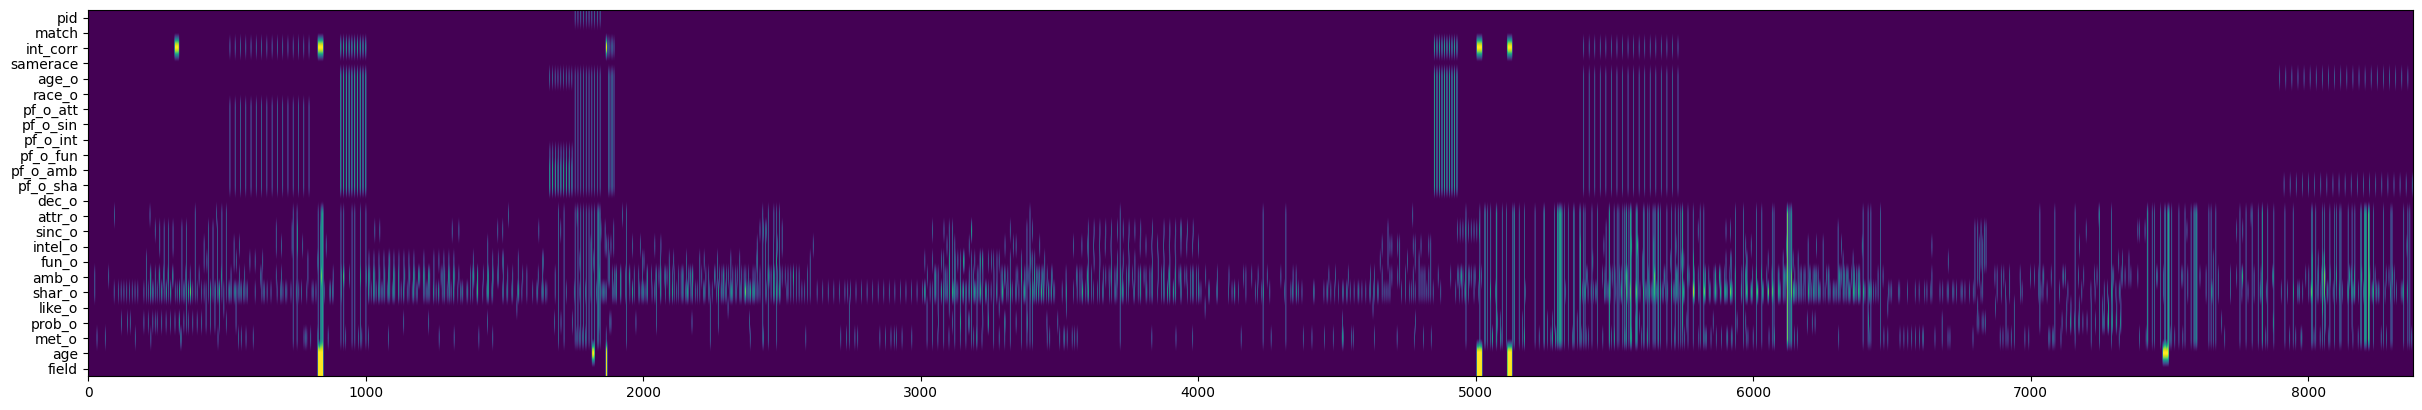

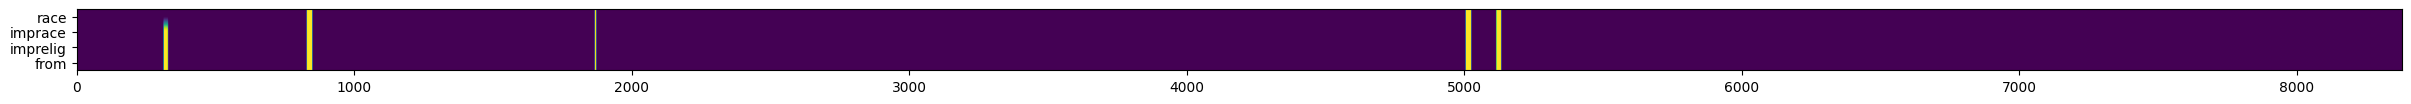

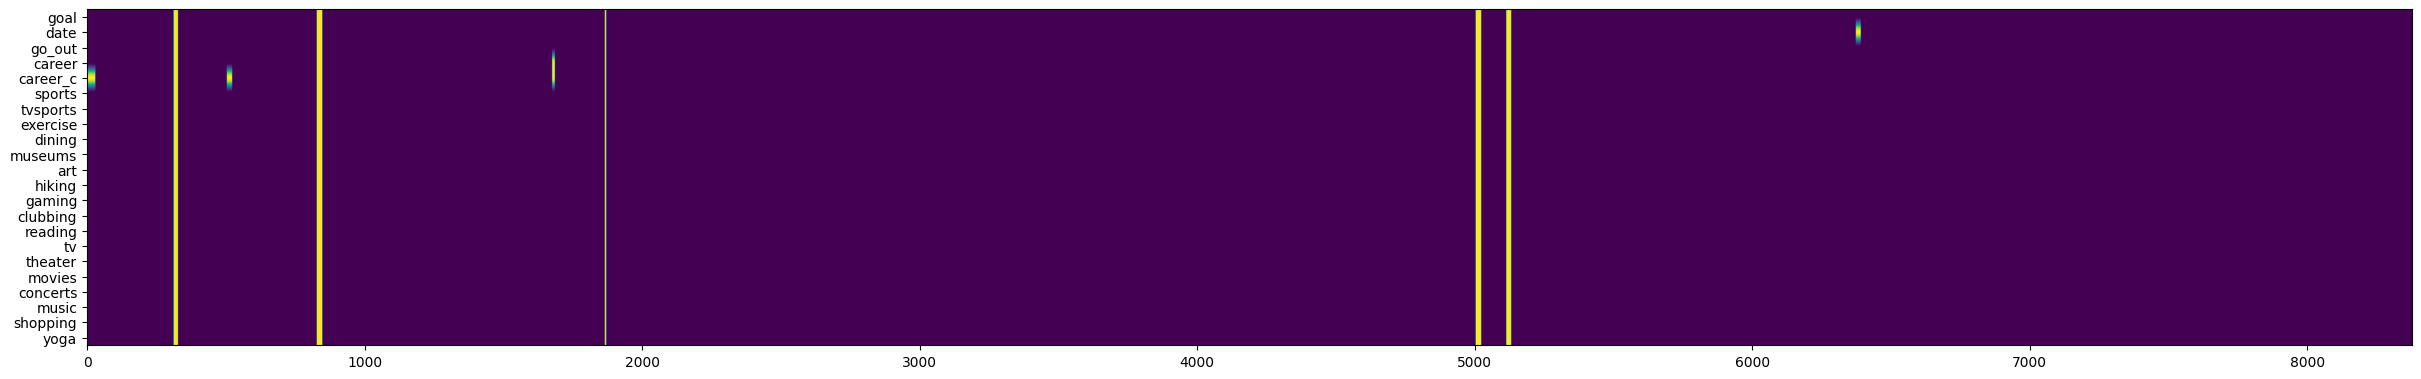

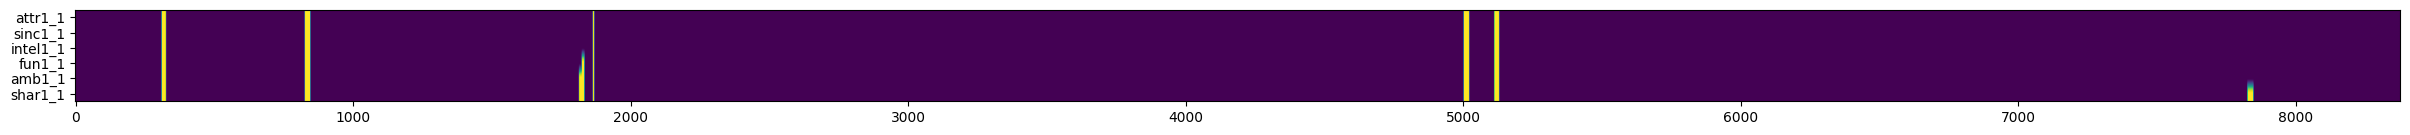

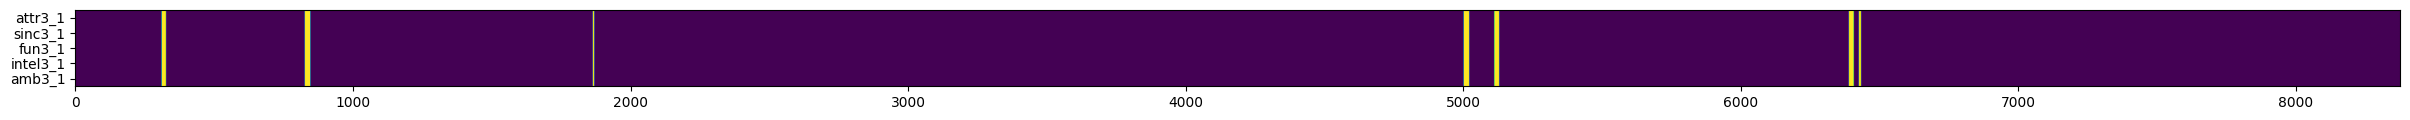

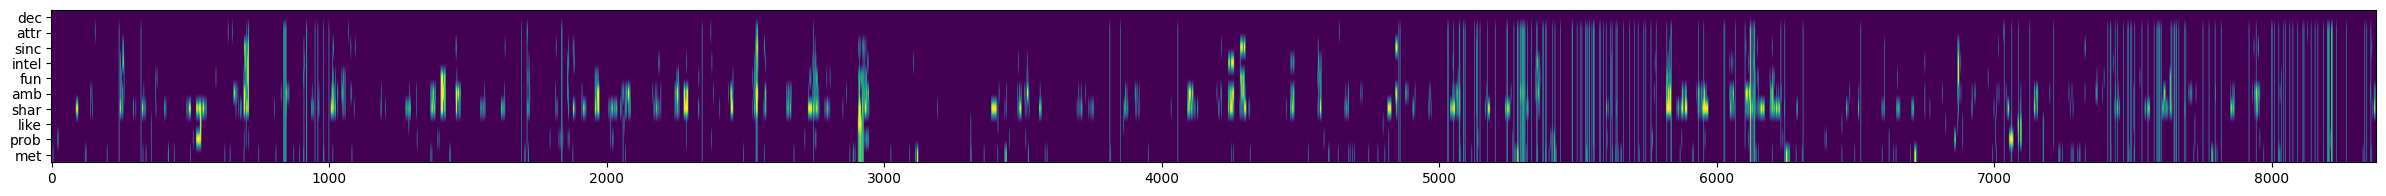

In [ ]:
for i in range(2,len(datingTemp)):
  tmp = datingTemp[i]
  ax = plt.figure(figsize=(30,15)).add_subplot(111)
  ax.imshow(tmp.isna().values.T)
  ax.set_aspect(55)
  plt.yticks(range(tmp.shape[1]), tmp.columns);

In [ ]:
date = date.drop(['iid','pid','field', 'from', 'career',], axis=1)

In [ ]:
date = date.drop(['dec','dec_o',], axis=1)# estan relacionadas directamente con a variable objetivo y sesgan el resultado del experimento

In [ ]:
date['int_corr'] = date['int_corr'].fillna(0)
date['career_c'] = date['career_c'].fillna(15)# 15 corresponde a otras carreras
date[['race_o','race','imprace', 'imprelig','goal', 'date', 'go_out']] = date[['race_o','race','imprace', 'imprelig','goal', 'date', 'go_out']].fillna(date.mode())
date = date.fillna(date.mean()) # Para todo lo demas usar la media


In [ ]:
for c in date.columns:
    print ("%20s"%c, date[c].dtype)

              gender float64
               match float64
            int_corr float64
            samerace float64
               age_o float64
              race_o float64
            pf_o_att float64
            pf_o_sin float64
            pf_o_int float64
            pf_o_fun float64
            pf_o_amb float64
            pf_o_sha float64
              attr_o float64
              sinc_o float64
             intel_o float64
               fun_o float64
               amb_o float64
              shar_o float64
              like_o float64
              prob_o float64
               met_o float64
                 age float64
                race float64
             imprace float64
            imprelig float64
                goal float64
                date float64
              go_out float64
            career_c float64
              sports float64
            tvsports float64
            exercise float64
              dining float64
             museums float64
              

In [ ]:
for col in date.columns:
  date[col] = MinMaxScaler().fit_transform(np.array(date[col]).reshape(-1,1))

<Axes: title={'center': 'Correlation Heatmap'}>

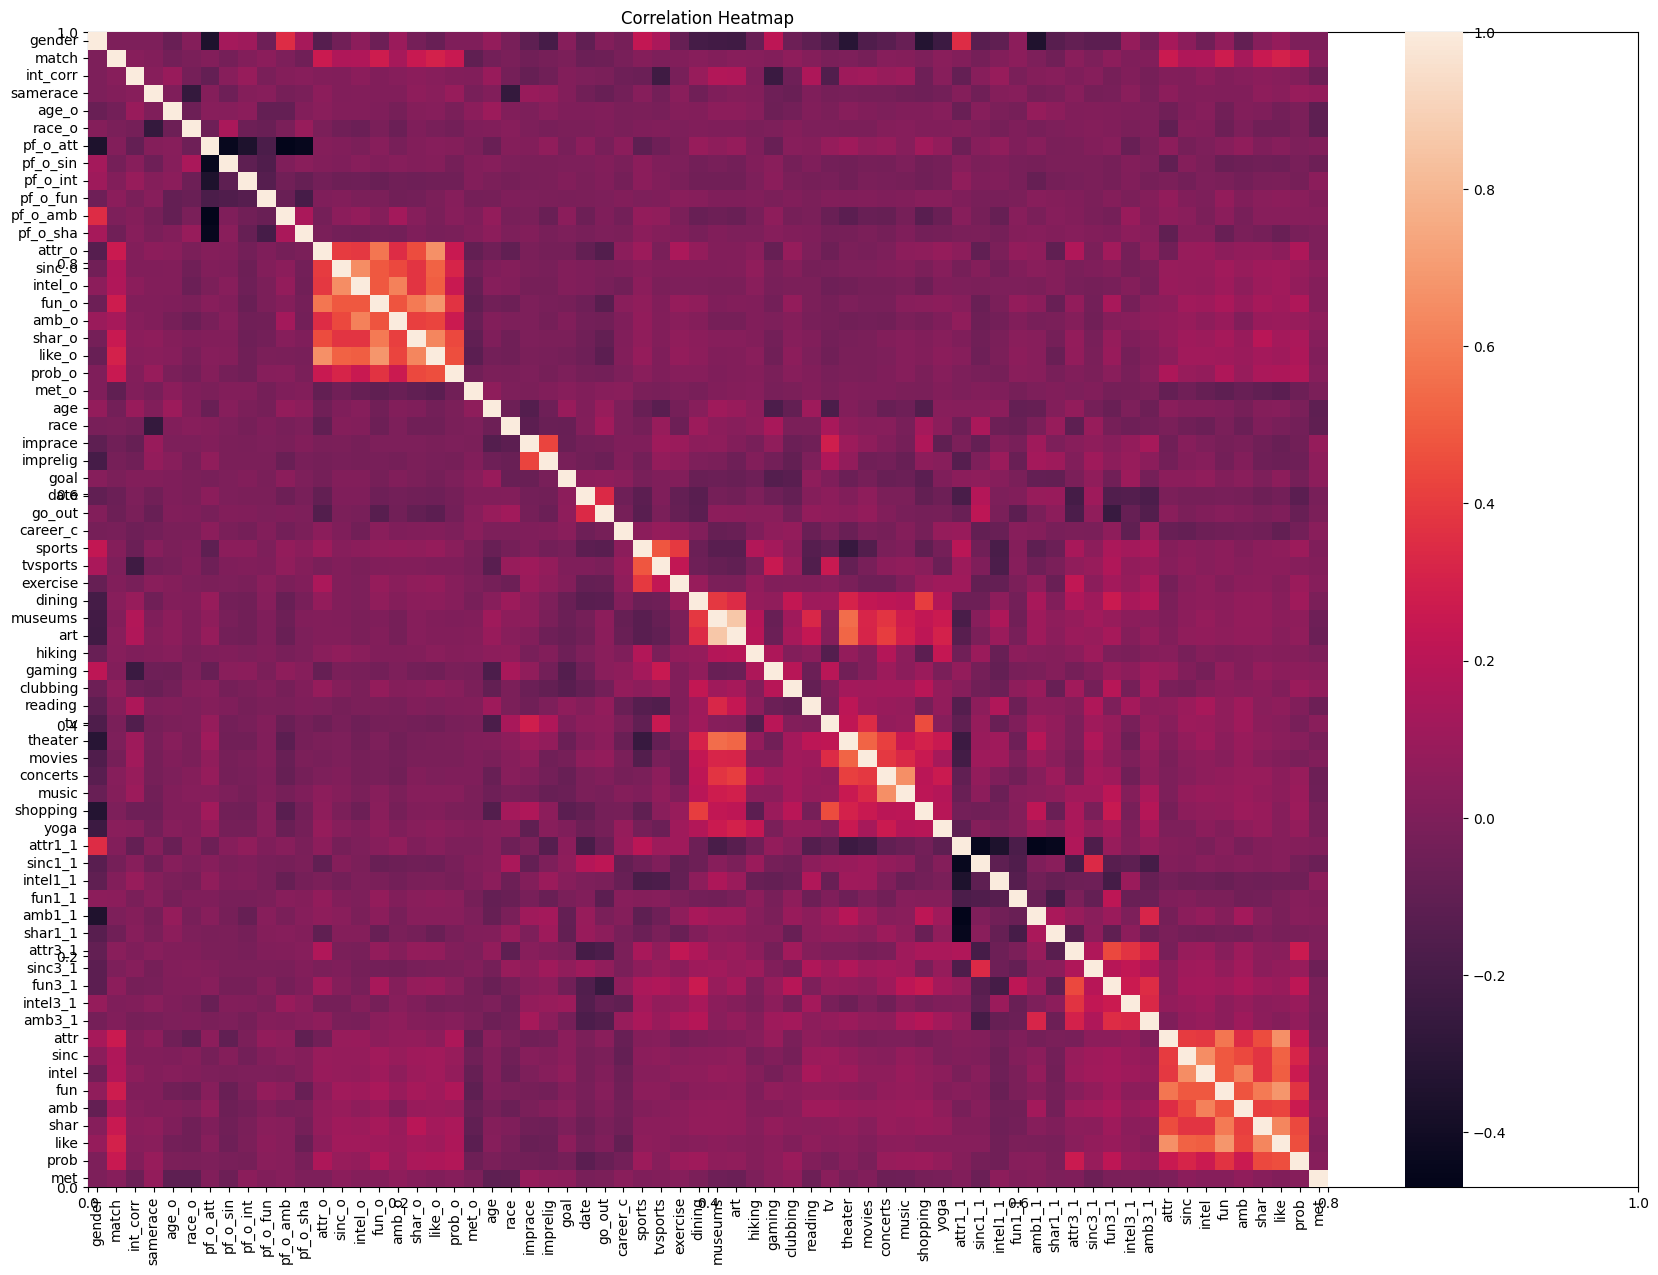

In [ ]:
# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
train, test = train_test_split(date, test_size = 0.30)

In [ ]:
X = train.drop("match", axis=1)
y = train["match"]

In [ ]:
# Entrenar un modelo de regresión lineal
model = LinearRegression().fit(X, y)

# Calcular los pesos de las columnas
pesos = model.coef_

# Imprimir los pesos de las columnas
print(pesos)

[-0.02465731  0.03789676 -0.01914429 -0.06341028  0.01602798 -0.01551751
 -0.00717228  0.05068221  0.0268641  -0.01964057 -0.00770754  0.26036743
 -0.09421586 -0.00645463  0.15205624 -0.0911273   0.09256563  0.18354698
  0.19196532 -0.48590171 -0.07933366  0.04070956 -0.02916872  0.01127295
  0.0041826  -0.04240893 -0.00852937  0.00582758 -0.02198468 -0.00652709
 -0.03829606  0.02111962 -0.1009617   0.09719825 -0.00558619  0.01441141
  0.03663267 -0.01064069  0.02429399 -0.01061325 -0.08903397  0.0806272
 -0.03752529 -0.06849512 -0.00405327  0.14092985  0.05266125  0.13454181
  0.2187797   0.02995296  0.00373366 -0.04432993 -0.00616648 -0.0850002
  0.04844474  0.04608513  0.20734253 -0.06865018 -0.01020966  0.11981778
 -0.06134642  0.0812717   0.23199278  0.18190945  0.03775709]


In [ ]:
model1 = DecisionTreeClassifier(max_depth=2).fit(X,y)
model2 = LogisticRegression(max_iter = 500).fit(X,y)
model3 = SVC(gamma=2).fit(X,y)
model4 = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=200).fit(X,y)
model5 = RidgeClassifier(max_iter=200).fit(X,y)
model6 = RandomForestClassifier(n_estimators=2, max_depth=5).fit(X,y)

In [ ]:
#plt.scatter(X['age'], X['int_corr'], c=y)
#plt.xlabel("Variable 1")
#plt.ylabel("Variable 2")
#plt.show()

In [ ]:
X = test.drop("match", axis=1)
y = test["match"]

In [ ]:
y_pre1 = model1.predict(X)
y_pre2 = model2.predict(X)
y_pre3 = model3.predict(X)
y_pre4 = model4.predict(X)
y_pre5 = model5.predict(X)
y_pre6 = model6.predict(X)


In [ ]:
print('Pred 1:',np.mean(y==y_pre1))
print('Pred 2:',np.mean(y==y_pre2))
print('Pred 3:',np.mean(y==y_pre3))
print('Pred 4:',np.mean(y==y_pre4))
print('Pred 5:',np.mean(y==y_pre5))
print('Pred 6:',np.mean(y==y_pre6))

Pred 1: 0.8333333333333334
Pred 2: 0.8504375497215593
Pred 3: 0.8385043754972156
Pred 4: 0.8480509148766905
Pred 5: 0.8480509148766905
Pred 6: 0.8353221957040573
